# Analyse Exploratoire des Données (EDA)
Ce notebook réalise une analyse exploratoire des données pour le projet de scoring de crédit.
## Importation des Bibliothèques Nécessaires

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage pour les graphiques
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
path_data = '../data/'

In [3]:
os.listdir(path_data)

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'mlruns',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [ ]:
path_data = '../data/'
path_docs = '../docs'

In [4]:
# Tables principales
app_train = pd.read_csv(os.path.join(path_data, 'application_train.csv'))

print("application_train shape:", app_train.shape)

application_train shape: (307511, 122)


Les données d'apprentissage comportent 30 7511 observations (chacune étant un prêt distinct) et 122 caractéristiques (variables), y compris la cible `TARGET` (l'étiquette que nous voulons prédire).

In [5]:
app_test = pd.read_csv(os.path.join(path_data, 'application_test.csv'))
print("application_test shape:", app_test.shape)

application_test shape: (48744, 121)


L'ensemble de test est considérablement plus petit et ne comporte pas de colonne `TARGET`.

# Analyse exploratoire

L'analyse exploratoire des données (EDA) est un processus ouvert dans le cadre duquel nous calculons des statistiques et établissons des chiffres afin de trouver des tendances, des anomalies, des modèles ou des relations dans les données. L'objectif de l'EDA est d'apprendre ce que nos données peuvent nous dire. Elle commence généralement par une vue d'ensemble, puis se concentre sur des domaines spécifiques au fur et à mesure que nous trouvons des zones intrigantes dans les données. Les résultats peuvent être intéressants en eux-mêmes ou être utilisés pour éclairer nos choix de modélisation, par exemple en nous aidant à décider des caractéristiques à utiliser.

## Examiner la distribution des colonnes cibles

La cible est ce que l'on nous demande de prédire : soit un 0 pour le prêt a été remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d'abord examiner le nombre de prêts entrant dans chaque catégorie.

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

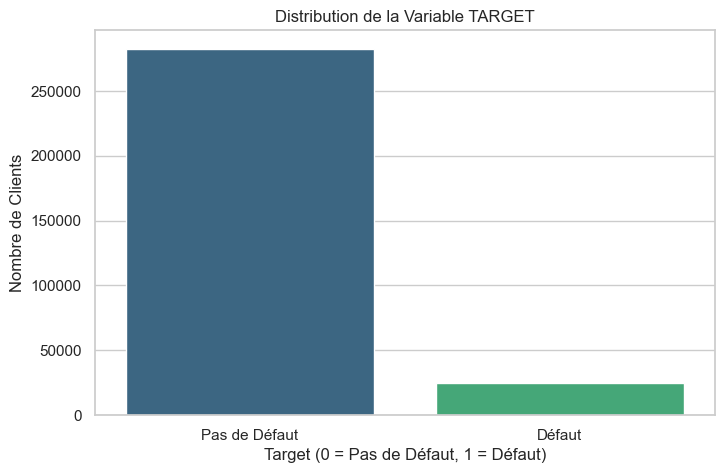

In [7]:
# Analyse de la distribution de la variable cible
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=app_train, palette='viridis')
plt.title('Distribution de la Variable TARGET')
plt.xlabel('Target (0 = Pas de Défaut, 1 = Défaut)')
plt.ylabel('Nombre de Clients')
plt.xticks([0, 1], ['Pas de Défaut', 'Défaut'])
plt.show()

In [8]:
# Pourcentage de chaque classe dans TARGET
target_counts = app_train['TARGET'].value_counts(normalize=True) * 100
print(f"Pourcentage de 0 (pas de problème de paiement) : {target_counts[0]:.2f}%")
print(f"Pourcentage de 1 (problèmes de paiement) : {target_counts[1]:.2f}%")

Pourcentage de 0 (pas de problème de paiement) : 91.93%
Pourcentage de 1 (problèmes de paiement) : 8.07%


Ces informations montrent qu'il s'agit d'un [problème de classes déséquilibrées](https://www.chioka.in/class-imbalance-problem/). Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Lorsque nous utiliserons des modèles d'apprentissage automatique plus sophistiqués, nous pourrons [pondérer les classes](http://xgboost.readthedocs.io/en/latest/parameter.html) en fonction de leur représentation dans les données afin de refléter ce déséquilibre.

## Examiner les valeurs manquantes

In [9]:
# Fonction pour calculer les valeurs manquantes par colonne
def missing_values_table(df):
        # Total des valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Pourcentage de valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Créer une table avec les résultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renommer les colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs Manquantes', 1 : '% du Total des Valeurs'})
        
        # Trier la table par pourcentage de valeurs manquantes de manière décroissante
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% du Total des Valeurs', ascending=False).round(1)
        
        # Afficher des informations de résumé
        print ("Le dataframe sélectionné contient " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes avec des valeurs manquantes.")
        
        # Retourner le dataframe avec les informations sur les valeurs manquantes
        return mis_val_table_ren_columns

In [10]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Le dataframe sélectionné contient 122 colonnes.
Il y a 67 colonnes avec des valeurs manquantes.


,Valeurs Manquantes,% du Total des Valeurs
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Quand viendra le moment de construire nos modèles de machine learning, nous devrons remplir ces valeurs manquantes (ce que l'on appelle l'imputation). Dans les travaux futurs, nous utiliserons des modèles tels que XGBoost qui [peuvent gérer les valeurs manquantes sans besoin d'imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Une autre option serait de supprimer les colonnes avec un pourcentage élevé de valeurs manquantes, bien qu'il soit impossible de savoir à l'avance si ces colonnes seront utiles pour notre modèle. Par conséquent, nous conserverons toutes les colonnes pour l'instant.

## Types de colonnes

Regardons le nombre de colonnes de chaque type de données. Les variables `int64` et `float64` sont des variables numériques (qui peuvent être soit discrètes soit continues). Les colonnes `object` contiennent des chaînes de caractères et sont des caractéristiques catégorielles.

In [11]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Examinons maintenant le nombre d'entrées uniques dans chacune des colonnes `object` (catégorielles).

In [12]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement restreint d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles !

## Encodage des variables catégorielles

### Encodage des étiquettes et encodage one-hot

Implémentons la politique décrite ci-dessus : pour toute variable catégorielle (dtype == object) avec 2 catégories uniques, nous utiliserons l'encodage des étiquettes (Label Encoding), et pour toute variable catégorielle avec plus de 2 catégories uniques, nous utiliserons l'encodage one-hot (One-Hot Encoding).

Pour l'encodage des étiquettes, nous utiliserons le `LabelEncoder de Scikit-Learn` et pour l'encodage one-hot, la fonction `get_dummies(df)` de pandas.


In [13]:
# Créer un objet de type label encoder
le = LabelEncoder()
le_count = 0

# Itérer à travers les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # Si 2 catégories uniques ou moins
        if len(list(app_train[col].unique())) <= 2:
            # Entraîner sur les données d'entraînement
            le.fit(app_train[col])
            # Transformer à la fois les données d'entraînement et de test
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Garder une trace du nombre de colonnes ayant subi un encodage des étiquettes
            le_count += 1
            
print('%d colonnes ont été encodées avec des étiquettes.' % le_count)

3 colonnes ont été encodées avec des étiquettes.


In [14]:
# Encodage one-hot des variables catégorielles
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Dimensions des caractéristiques d\'entraînement : ', app_train.shape)
print('Dimensions des caractéristiques de test : ', app_test.shape)

Dimensions des caractéristiques d'entraînement :  (307511, 243)
Dimensions des caractéristiques de test :  (48744, 239)


### Alignement des données d'entraînement et de test

Il doit y avoir les mêmes caractéristiques (colonnes) dans les données d'entraînement et de test. L'encodage one-hot a créé plus de colonnes dans les données d'entraînement car certaines variables catégorielles avaient des catégories non représentées dans les données de test. Pour supprimer les colonnes des données d'entraînement qui ne sont pas dans les données de test, nous devons aligner les dataframes. D'abord, nous extrayons la colonne cible des données d'entraînement (car celle-ci n'est pas dans les données de test mais nous devons conserver cette information). Lorsque nous effectuons l'alignement, nous devons nous assurer de définir `axis = 1` pour aligner les dataframes en fonction des colonnes et non des lignes !

In [15]:
# Extraire les étiquettes de la colonne cible des données d'entraînement
train_labels = app_train['TARGET']

# Aligner les données d'entraînement et de test, ne conserver que les colonnes présentes dans les deux dataframes
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# Ajouter à nouveau la colonne cible
app_train['TARGET'] = train_labels

print('Dimensions des caractéristiques d\'entraînement : ', app_train.shape)
print('Dimensions des caractéristiques de test : ', app_test.shape)

Dimensions des caractéristiques d'entraînement :  (307511, 240)
Dimensions des caractéristiques de test :  (48744, 239)


Les ensembles de données d'entraînement et de test ont maintenant les mêmes caractéristiques, ce qui est nécessaire pour le machine learning. Le nombre de caractéristiques a considérablement augmenté en raison de l'encodage one-hot. À un moment donné, nous voudrons probablement essayer la réduction de dimensionnalité (supprimer les caractéristiques qui ne sont pas pertinentes) pour réduire la taille des ensembles de données.

# Retour à l'analyse exploratoire des données

## Anomalies

Un problème que nous devons toujours surveiller lors de l'analyse exploratoire des données (EDA) est la présence d'anomalies dans les données. Celles-ci peuvent être dues à des erreurs de saisie, des erreurs d'équipement de mesure, ou elles peuvent être des mesures valides mais extrêmes. Une façon de détecter les anomalies quantitativement est de regarder les statistiques d'une colonne en utilisant la méthode `describe`. Les chiffres dans la colonne `DAYS_BIRTH` sont négatifs car ils sont enregistrés par rapport à la date de la demande de prêt actuelle. Pour voir ces statistiques en années, nous pouvons multiplier par -1 et diviser par le nombre de jours dans une année :

In [16]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Ces âges semblent raisonnables. Il n'y a pas de valeurs aberrantes pour l'âge, ni à l'extrémité haute ni à l'extrémité basse. Qu'en est-il des jours d'emploi ?

In [17]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Cela ne semble pas correct ! La valeur maximale (en plus d'être positive) est d'environ 1000 ans !

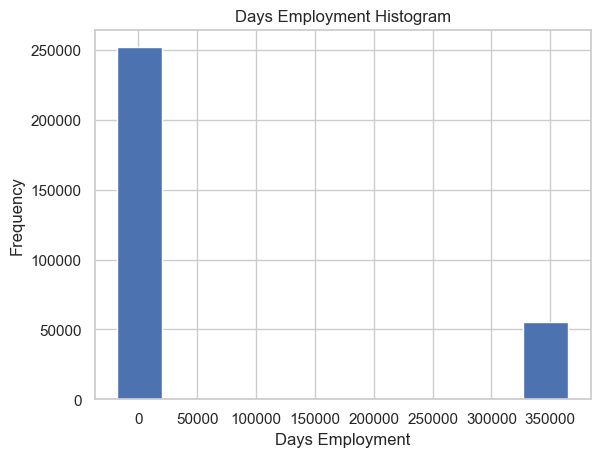

In [18]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Par curiosité, faisons un sous-ensemble des clients présentant des anomalies et voyons s'ils ont tendance à avoir des taux de défaut plus élevés ou plus bas que le reste des clients.

In [19]:
# Séparer les clients avec des valeurs anormales pour DAYS_EMPLOYED
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

# Afficher les taux de défaut pour les clients non anormaux et anormaux
print('Les non-anomalies font défaut sur %0.2f%% des prêts' % (100 * non_anom['TARGET'].mean()))
print('Les anomalies font défaut sur %0.2f%% des prêts' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours d\'emploi anormaux' % len(anom))


Les non-anomalies font défaut sur 8.66% des prêts
Les anomalies font défaut sur 5.40% des prêts
Il y a 55374 jours d'emploi anormaux


C'est extrêmement intéressant ! Il s'avère que les anomalies ont un taux de défaut plus faible.

Le traitement des anomalies dépend de la situation exacte, sans règles fixes. Une des approches les plus sûres est de simplement définir les anomalies comme une valeur manquante et de les remplir ensuite (en utilisant l'imputation) avant le machine learning. Dans ce cas, puisque toutes les anomalies ont exactement la même valeur, nous voulons les remplir avec la même valeur au cas où tous ces prêts partagent quelque chose en commun. Les valeurs anormales semblent avoir une certaine importance, nous voulons donc indiquer au modèle de machine learning si nous avons effectivement rempli ces valeurs. Comme solution, nous allons remplir les valeurs anormales avec une valeur "non numérique" (np.nan) puis créer une nouvelle colonne booléenne indiquant si la valeur était ou non anormale.

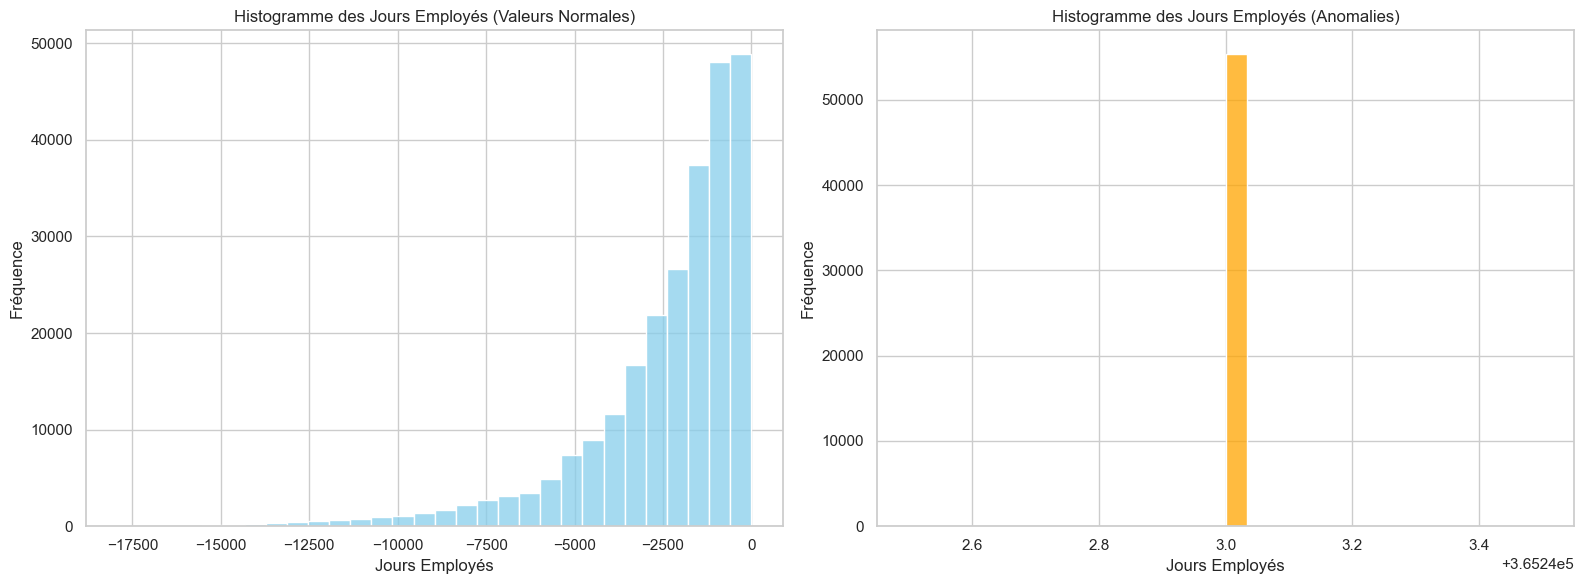

In [20]:
# Définition des tailles des figures
plt.figure(figsize=(16, 6))

# Histogramme pour les valeurs normales
plt.subplot(1, 2, 1)
sns.histplot(non_anom['DAYS_EMPLOYED'], bins=30, color='skyblue')
plt.title('Histogramme des Jours Employés (Valeurs Normales)')
plt.xlabel('Jours Employés')
plt.ylabel('Fréquence')

# Histogramme pour les anomalies
plt.subplot(1, 2, 2)
sns.histplot(anom['DAYS_EMPLOYED'], bins=30, color='orange')
plt.title('Histogramme des Jours Employés (Anomalies)')
plt.xlabel('Jours Employés')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [21]:
# Créer une colonne de drapeau pour les valeurs anormales
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs anormales par nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

La distribution semble être beaucoup plus en ligne avec ce à quoi nous nous attendions, et nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient initialement anormales (car nous devrons remplir les NAN avec une certaine valeur, probablement la médiane de la colonne). Les autres colonnes avec `DAYS` dans le dataframe semblent être conformes à ce que nous attendons sans valeurs aberrantes évidentes.

Il est extrêmement important de noter que tout ce que nous faisons aux données d'entraînement, nous devons également le faire aux données de test. Assurons-nous de créer la nouvelle colonne et de remplir la colonne existante avec `np.nan` dans les données de test.

In [22]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

print('Il y a %d anomalies dans les données de test sur %d entrées' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

Il y a 9274 anomalies dans les données de test sur 48744 entrées


## Corrélations

Maintenant que nous avons traité les variables catégorielles et les valeurs aberrantes, continuons avec l'analyse exploratoire des données (EDA). Une façon de tenter de comprendre les données est de rechercher des corrélations entre les caractéristiques et la cible. Nous pouvons calculer le coefficient de corrélation de Pearson entre chaque variable et la cible en utilisant la méthode `.corr` du dataframe.

Le coefficient de corrélation n'est pas la meilleure méthode pour représenter la "pertinence" d'une caractéristique, mais il nous donne une idée des relations possibles au sein des données. [Quelques interprétations générales de la valeur absolue du coefficient de corrélation](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) sont :

* 0.00-0.19 : "très faible"
* 0.20-0.39 : "faible"
* 0.40-0.59 : "modérée"
* 0.60-0.79 : "forte"
* 0.80-1.0 : "très forte"


In [23]:
# Trouver les corrélations avec la cible et trier
correlations = app_train.corr()['TARGET'].sort_values()

# Afficher les corrélations
print('Corrélations les plus positives :\n', correlations.tail(15))
print('\nCorrélations les plus négatives :\n', correlations.head(15))

Corrélations les plus positives :
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Corré

Jetons un coup d'œil à certaines des corrélations les plus significatives : le `DAYS_BIRTH` est la corrélation la plus positive (à l'exception de `TARGET` car la corrélation d'une variable avec elle-même est toujours de 1 !). En regardant la documentation, `DAYS_BIRTH` correspond à l'âge en jours du client au moment de la demande de prêt en jours négatifs (pour une raison quelconque !). La corrélation est positive, mais la valeur de cette caractéristique est en réalité négative, ce qui signifie que plus le client est âgé, moins il est susceptible de faire défaut sur son prêt (c'est-à-dire que la cible == 0). C'est un peu déroutant, donc nous allons prendre la valeur absolue de cette caractéristique et ensuite la corrélation sera négative.



## Effet de l'âge sur le remboursement

In [24]:
# Trouver la corrélation entre les jours positifs depuis la naissance et la cible
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

À mesure que le client vieillit, il y a une relation linéaire négative avec la cible, ce qui signifie que, plus les clients sont âgés, plus ils ont tendance à rembourser leurs prêts à temps.

Commençons à examiner cette variable. Tout d'abord, nous pouvons faire un histogramme de l'âge. Nous mettrons l'axe des x en années pour rendre le graphique un peu plus compréhensible.

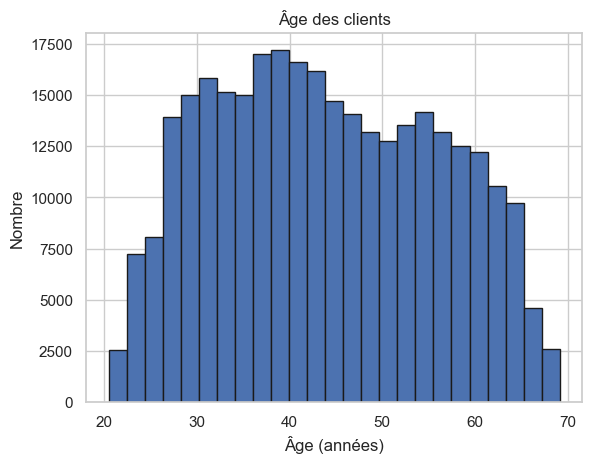

In [25]:
# Tracer la distribution des âges en années
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Âge des clients')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre')
plt.show()

À elle seule, la distribution de l'âge ne nous apprend pas grand-chose, si ce n'est qu'il n'y a pas de valeurs aberrantes, car tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite créer un graphique d'[estimation de densité de noyau](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) coloré par la valeur de la cible. Un graphique d'[de densité de noyau montre la distribution d'une seule variable](https://en.wikipedia.org/wiki/Kernel_density_estimationestimation) et peut être considéré comme un histogramme lissé (il est créé en calculant un noyau, généralement gaussien, à chaque point de données, puis en moyennant tous les noyaux individuels pour développer une seule courbe lisse). Nous utiliserons seaborn kdeplot pour ce graphique.

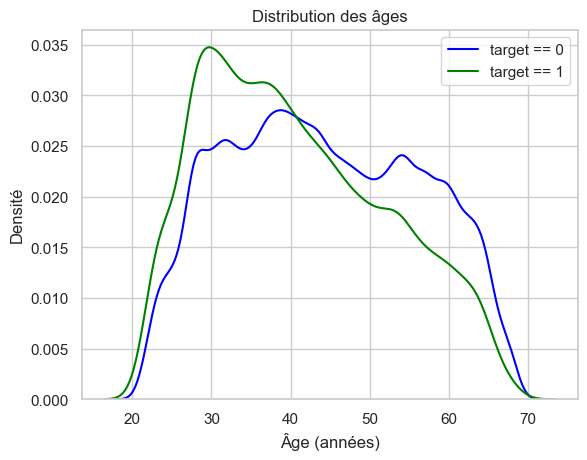

In [34]:
# Graphique KDE des prêts remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0', color='blue')

# Graphique KDE des prêts non remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1', color='green')

# Étiquetage du graphique
plt.xlabel('Âge (années)')
plt.ylabel('Densité')
plt.title('Distribution des âges')
plt.legend()
plt.show()

La courbe pour `target == 1` s'incline vers l'extrémité la plus jeune de la plage. Bien que cela ne soit pas une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle de machine learning car elle affecte la cible. Examinons cette relation d'une autre manière : la moyenne des échecs de remboursement des prêts par tranche d'âge.

Pour créer ce graphique, nous allons d'abord découper la catégorie d'âge en tranches de 5 ans chacune. Ensuite, pour chaque tranche, nous calculerons la valeur moyenne de la cible, ce qui nous indiquera le ratio de prêts non remboursés dans chaque catégorie d'âge.

In [27]:
# Informations sur l'âge dans un dataframe séparé
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Découper les données d'âge en tranches
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [28]:
# Grouper par tranche d'âge et calculer les moyennes
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


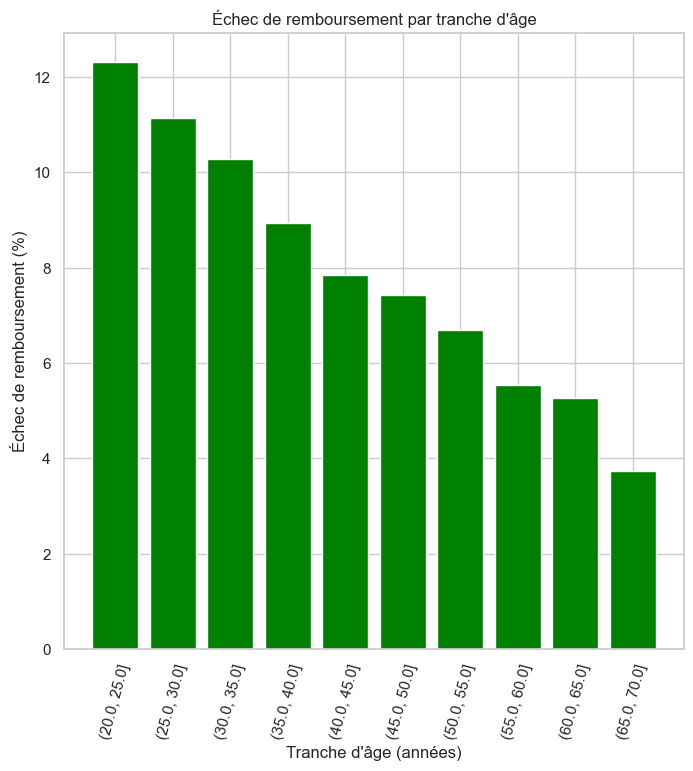

In [35]:
plt.figure(figsize = (8, 8))

# Graphique des tranches d'âge et de la moyenne de la cible sous forme de diagramme en barres
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color='green')

# Étiquetage du graphique
plt.xticks(rotation = 75)
plt.xlabel('Tranche d\'âge (années)')
plt.ylabel('Échec de remboursement (%)')
plt.title('Échec de remboursement par tranche d\'âge')
plt.show()

Il y a une tendance claire : les candidats plus jeunes sont plus susceptibles de ne pas rembourser le prêt ! Le taux d'échec de remboursement est supérieur à 10 % pour les trois groupes d'âge les plus jeunes et inférieur à 5 % pour le groupe d'âge le plus âgé.

C'est une information qui pourrait être directement utilisée par la banque : comme les clients plus jeunes sont moins susceptibles de rembourser le prêt, peut-être devraient-ils recevoir plus de conseils ou de recommandations en matière de planification financière. Cela ne signifie pas que la banque doit discriminer les clients plus jeunes, mais il serait judicieux de prendre des mesures de précaution pour aider les clients plus jeunes à payer à temps.

### Sources extérieures

Les 3 variables ayant les corrélations négatives les plus fortes avec la cible sont `EXT_SOURCE_1`, `EXT_SOURCE_2` et `EXT_SOURCE_3`. Selon la documentation, ces caractéristiques représentent un "score normalisé provenant de sources de données externes". Je ne suis pas sûr de ce que cela signifie exactement, mais il pourrait s'agir d'une sorte de note de crédit cumulative établie à partir de nombreuses sources de données.

Jetons un coup d'œil à ces variables.

Tout d'abord, nous pouvons afficher les corrélations des caractéristiques `EXT_SOURCE` avec la cible et entre elles.


In [30]:
# Extraire les variables EXT_SOURCE et afficher les corrélations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


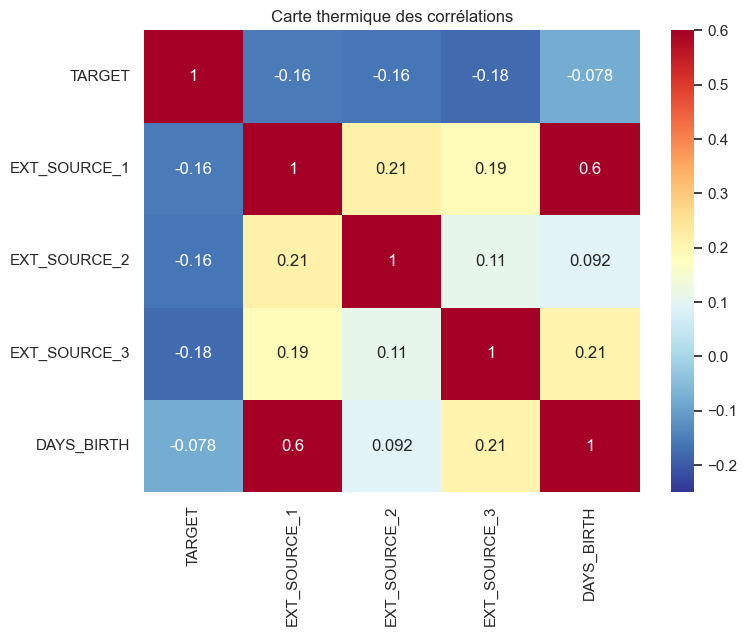

In [31]:
plt.figure(figsize = (8, 6))

# Heatmap des corrélations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Carte thermique des corrélations')
plt.show()

Les trois caractéristiques `EXT_SOURCE` ont des corrélations négatives avec la cible, indiquant que plus la valeur de `EXT_SOURCE` augmente, plus le client est susceptible de rembourser le prêt. Nous pouvons également voir que `DAYS_BIRTH` est positivement corrélé avec `EXT_SOURCE_1`, indiquant que l'âge du client pourrait être l'un des facteurs de ce score.

Ensuite, nous pouvons examiner la distribution de chacune de ces caractéristiques en les colorant par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

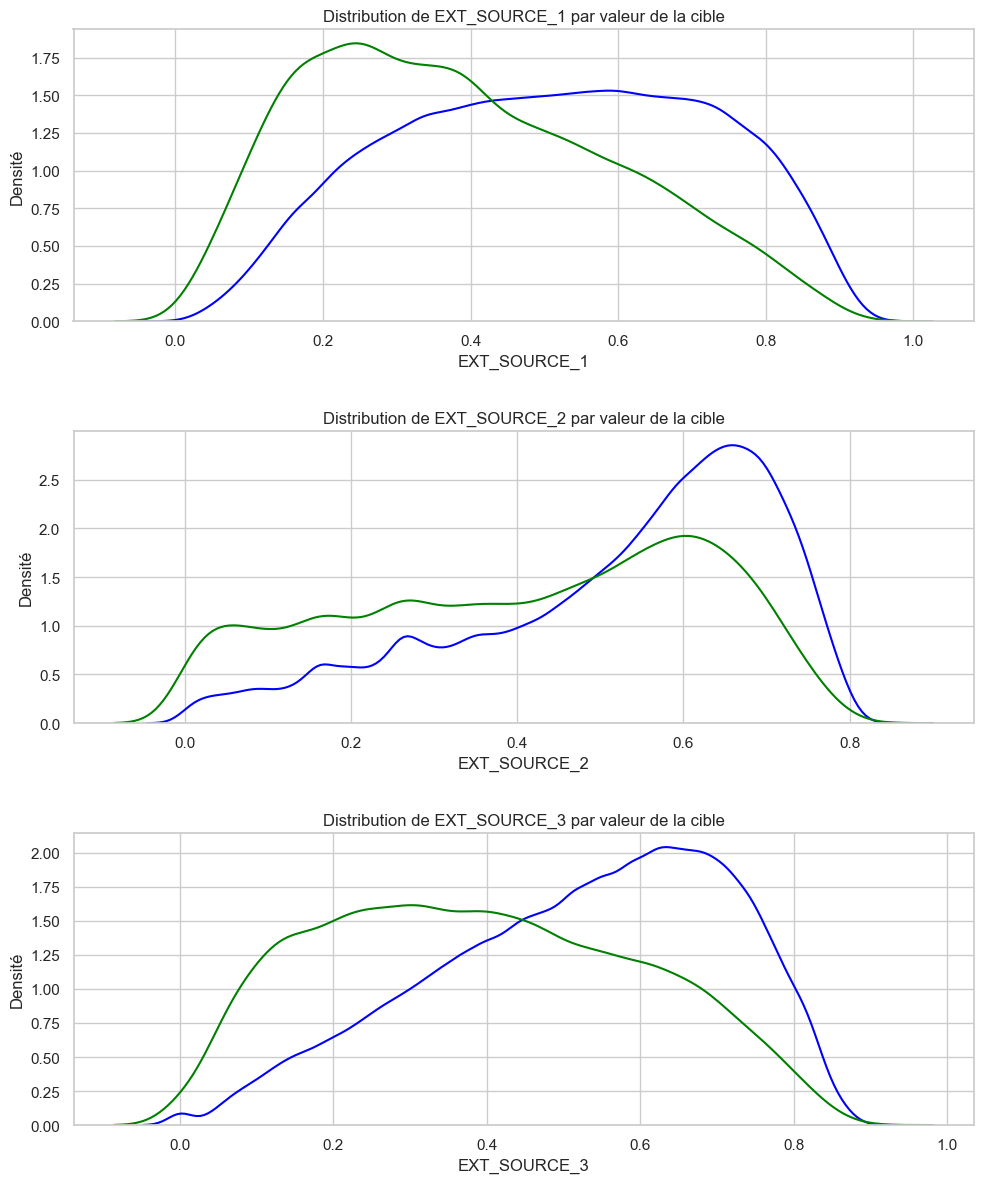

In [36]:
plt.figure(figsize = (10, 12))

# Itérer à travers les sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Créer un nouveau subplot pour chaque source
    plt.subplot(3, 1, i + 1)
    # Tracer les prêts remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target == 0', color='blue')
    # Tracer les prêts non remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target == 1', color='green')
    
    # Étiqueter les graphiques
    plt.title('Distribution de %s par valeur de la cible' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Densité')
    
plt.tight_layout(h_pad = 2.5)
plt.show()

`EXT_SOURCE_3` montre la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte (en fait, elles sont toutes [considérées comme très faibles](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf)), mais ces variables seront tout de même utiles pour un modèle de machine learning pour prédire si un demandeur remboursera un prêt à temps ou non.

### Graphique des paires

En tant que dernier graphique exploratoire, nous pouvons créer un graphique des paires des variables `EXT_SOURCE` et de la variable `DAYS_BIRTH`. Le [graphique des paires](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables uniques. Ici, nous utilisons la bibliothèque de visualisation Seaborn et la fonction PairGrid pour créer un graphique des paires avec des nuages de points sur le triangle supérieur, des histogrammes sur la diagonale et des graphiques de densité 2D et des coefficients de corrélation sur le triangle inférieur.

Si vous ne comprenez pas ce code, ce n'est pas grave ! La création de graphiques en Python peut être excessivement complexe, et pour tout ce qui dépasse les graphiques les plus simples, je trouve généralement une implémentation existante et j'adapte le code (ne vous répétez pas) !



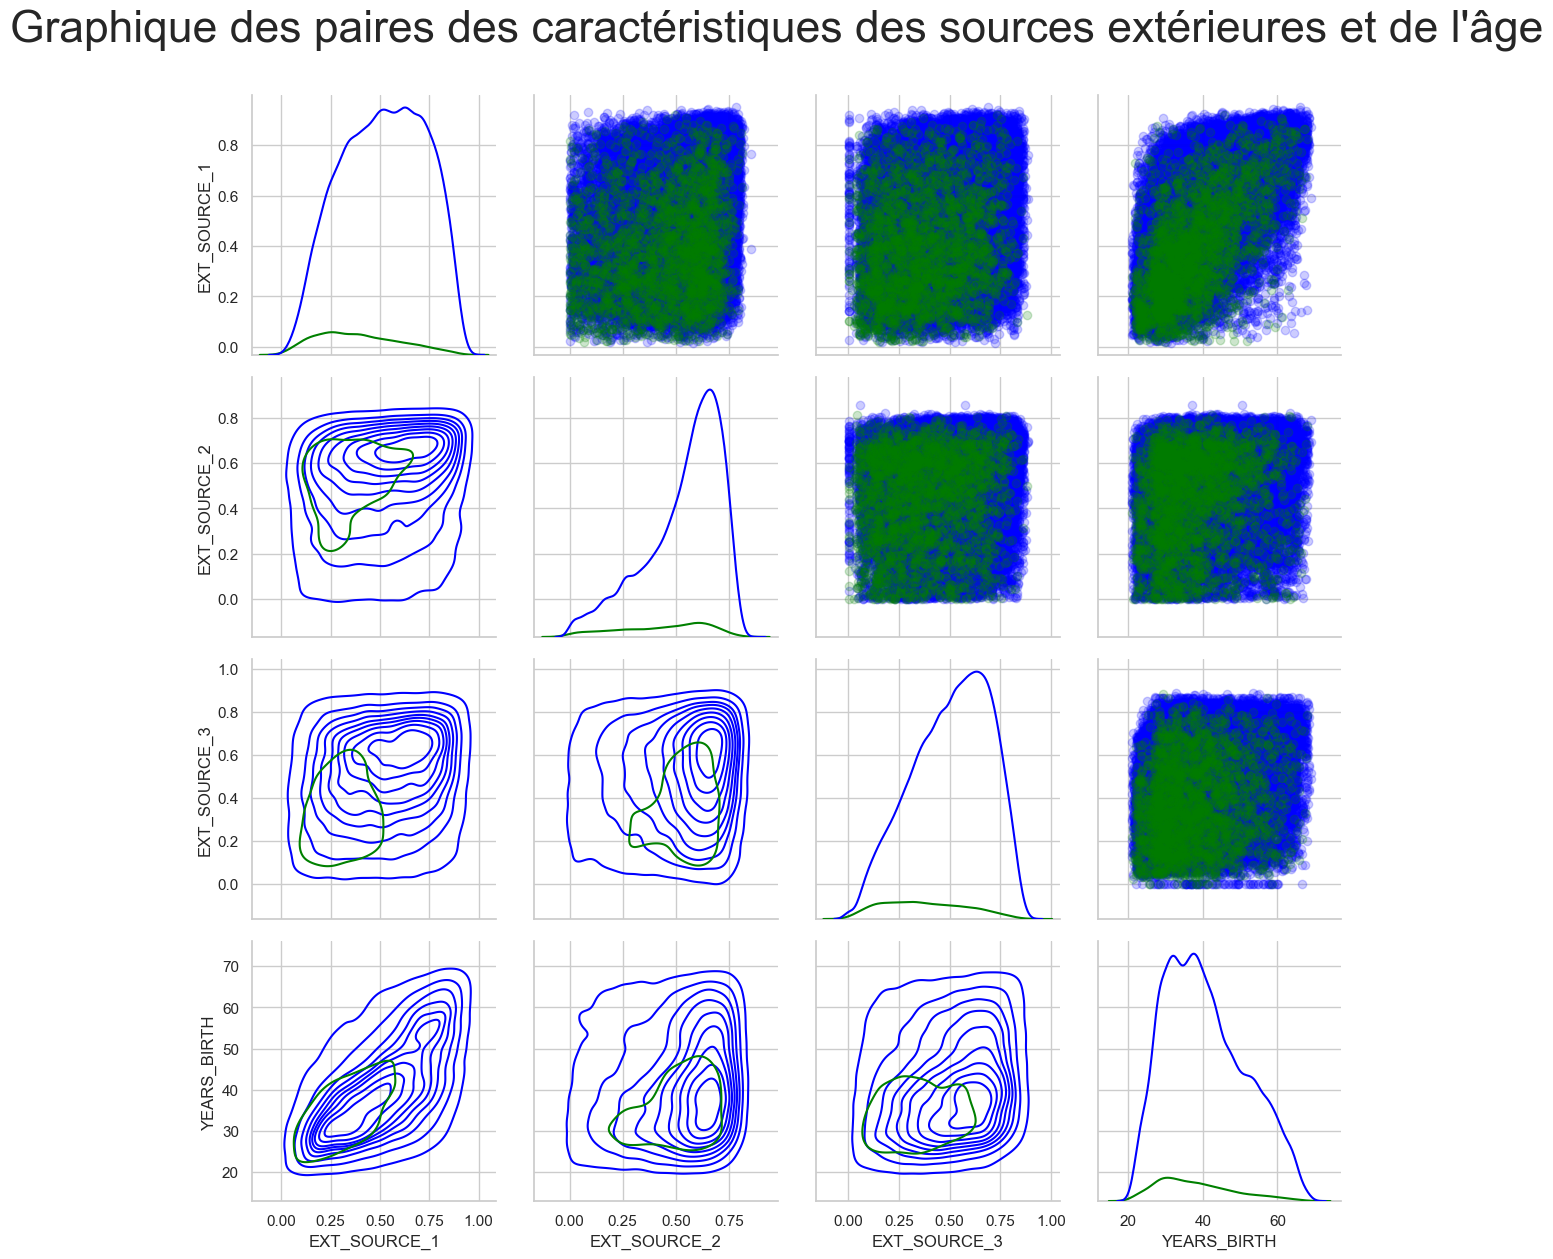

In [39]:
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000, :]

# Créer l'objet PairGrid avec les couleurs spécifiées pour les valeurs TARGET
grid = sns.PairGrid(data=plot_data, size=3, diag_sharey=False,
                    hue='TARGET', palette=['blue', 'green'],
                    vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

# Nuages de points pour la partie supérieure
grid.map_upper(plt.scatter, alpha=0.2)

# KDE plots pour la diagonale
grid.map_diag(sns.kdeplot)

# KDE plots pour la partie inférieure avec remplissage
grid.map_lower(sns.kdeplot)

# Titre général pour le graphique
plt.suptitle('Graphique des paires des caractéristiques des sources extérieures et de l\'âge', size=32, y=1.05)
plt.show()

Dans ce graphique, le rouge indique les prêts qui n'ont pas été remboursés et le bleu indique les prêts qui ont été remboursés. Nous pouvons voir les différentes relations au sein des données. Il semble y avoir une relation linéaire positive modérée entre `EXT_SOURCE_1` et `DAYS_BIRTH` (ou équivalemment `YEARS_BIRTH`), indiquant que cette caractéristique peut prendre en compte l'âge du client.
